In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

In [2]:
#Directory:
dataset_dir = r'D:\kelaswork\jupyterlab\animals'
test_dir = r'D:\kelaswork\jupyterlab\test_animals'

In [17]:
# ImageDataGenerator with split validation
datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.1,validation_split=0.1,fill_mode='nearest', rotation_range=30)
datagen_test = ImageDataGenerator(rescale=1./255,zoom_range=0.1,fill_mode='nearest', rotation_range=30)

# Generator for training
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(750, 500),
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

#Generator for validasi
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(750, 500),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

#Generator for test
test_generator = datagen_test.flow_from_directory(
    test_dir,
    target_size=(750, 500),
    batch_size=32,
    class_mode='categorical' 
)

Found 584 images belonging to 4 classes.
Found 64 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [9]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.80:
            print('Akurasi mencapai 99%, menghentikan pelatihan.')
            self.model.stop_training = True

callback = MyCallback()

In [10]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(750, 500, 3)),
    MaxPooling2D((2,2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(4,activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 748, 498, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 374, 249, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 372, 247, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 186, 123, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 366048)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 366048)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │       1,464,196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,964 (5.60 MB)

 Trainable params: 1,466,964 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[callback])

Epoch 1/20


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 555s 20s/step - accuracy: 0.2257 - loss: 6.5498 - val_accuracy: 0.3056 - val_loss: 1.3951
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 357s 13s/step - accuracy: 0.3255 - loss: 1.3156 - val_accuracy: 0.3194 - val_loss: 1.3397
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 305s 12s/step - accuracy: 0.3083 - loss: 1.2777 - val_accuracy: 0.2917 - val_loss: 1.3231
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 306s 11s/step - accuracy: 0.3818 - loss: 1.2310 - val_accuracy: 0.3333 - val_loss: 1.2850
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 322s 13s/step - accuracy: 0.4031 - loss: 1.1778 - val_accuracy: 0.4306 - val_loss: 1.2548
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 314s 12s/step - accuracy: 0.4401 - loss: 1.1759 - val_accuracy: 0.4861 - val_loss: 1.2260
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 407s 17s/step - accuracy: 0.4752 - loss: 1.1525 - val_accuracy: 0.3750 - val_loss: 1.2367
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 384s 16s/step - accuracy: 0.5137 - loss: 1.1209 - val_accuracy: 0.5694 - val_

In [ ]:
model.save('D:\kelaswork\jupyterlab\animals_model.h5')

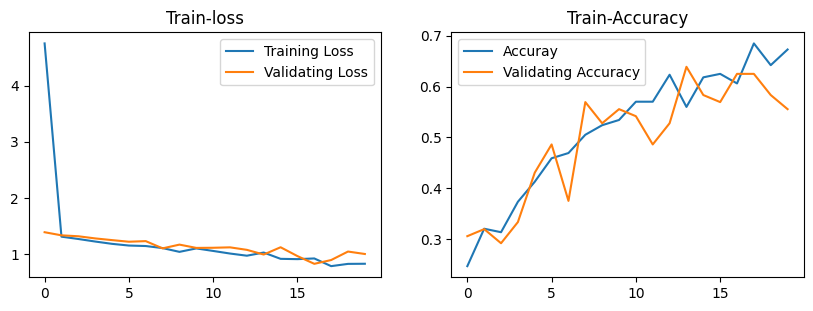

In [29]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'],label= 'Validating Loss')
plt.title('Train-loss')
plt.legend()
plt.savefig('10.jpg')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label= 'Accuray')
plt.plot(history.history['val_accuracy'],label= 'Validating Accuracy')
plt.title('Train-Accuracy')
plt.legend()
plt.savefig('11.jpg')

In [18]:
test_loss, test_accuracy = model.evaluate(test_generator)

# Print hasil evaluasi
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6437 - loss: 0.9950
Test Loss: 0.9932826161384583
Test Accuracy: 0.6388888955116272


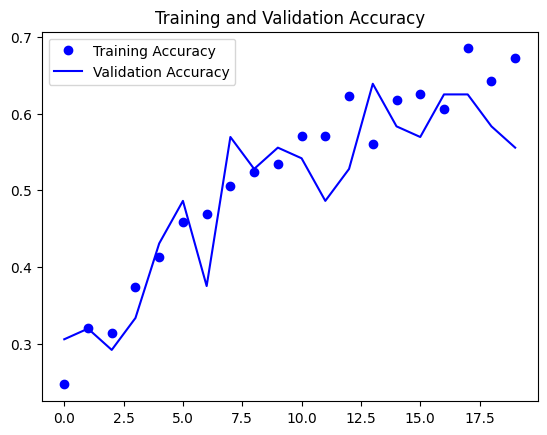

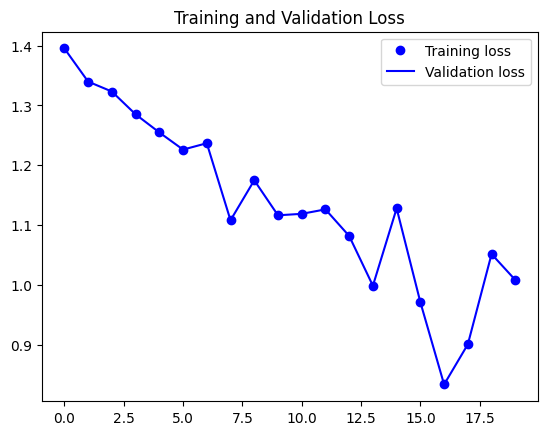

In [31]:
#Result
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['val_loss']
val_loss = history.history['val_loss']
ephocs= range(len(accuracy))
plt.plot(ephocs, accuracy,'bo', label='Training Accuracy')
plt.plot(ephocs, val_accuracy,'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('14.jpg')
plt.figure()
plt.plot(ephocs, loss,'bo', label='Training loss')
plt.plot(ephocs, val_loss,'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('13.jpg')